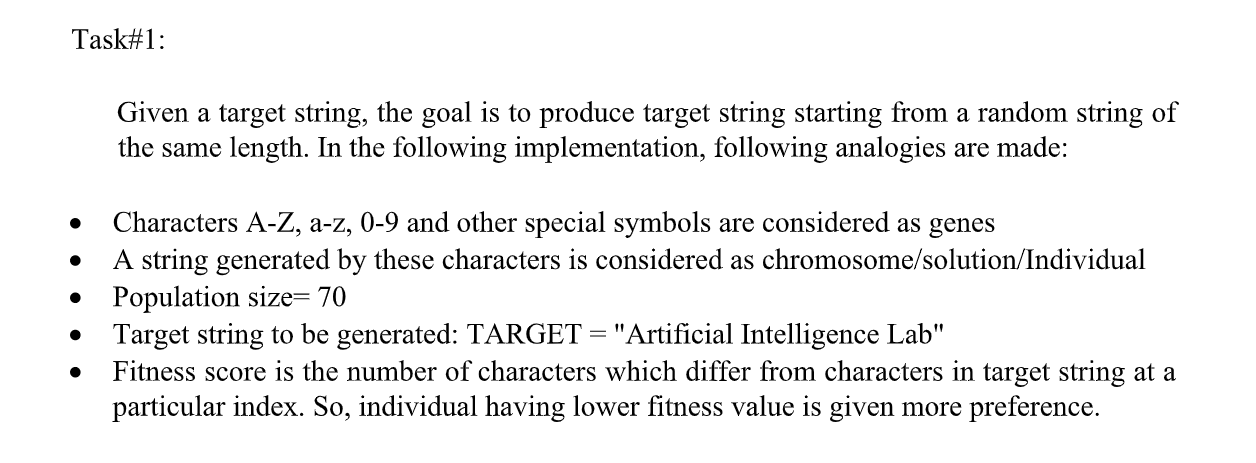

In [5]:
import random
import string

TARGET = "Artificial Intelligence Lab"
POPULATION_SIZE = 70

def generate_random_string(length):
    return ''.join(random.choice(string.ascii_letters + string.digits + string.punctuation + ' ') for _ in range(length))

def calculate_fitness_score(individual):
    return sum(1 for i, j in zip(individual, TARGET) if i != j)

def generate_initial_population(population_size):
    return [generate_random_string(len(TARGET)) for _ in range(population_size)]

def selection(population):
    return sorted(population, key=calculate_fitness_score)

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(TARGET) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutation(individual, mutation_rate):
    mutated_individual = ''
    for gene in individual:
        if random.random() < mutation_rate:
            mutated_individual += random.choice(string.ascii_letters + string.digits + string.punctuation + ' ')
        else:
            mutated_individual += gene
    return mutated_individual

def genetic_algorithm():
    population = generate_initial_population(POPULATION_SIZE)
    generation = 1
    while True:
        population = selection(population)
        if population[0] == TARGET:
            return population[0], generation
        new_population = []
        for _ in range(POPULATION_SIZE // 2):
            parent1, parent2 = random.choices(population[:10], k=2)  # Select top 10 individuals as parents
            child1, child2 = crossover(parent1, parent2)
            child1 = mutation(child1, mutation_rate=0.1)
            child2 = mutation(child2, mutation_rate=0.1)
            new_population.extend([child1, child2])
        population = new_population
        generation += 1

# Run the genetic algorithm
result, generation = genetic_algorithm()
print("Target string '{}' generated in generation {}".format(result, generation))

Target string 'Artificial Intelligence Lab' generated in generation 3629


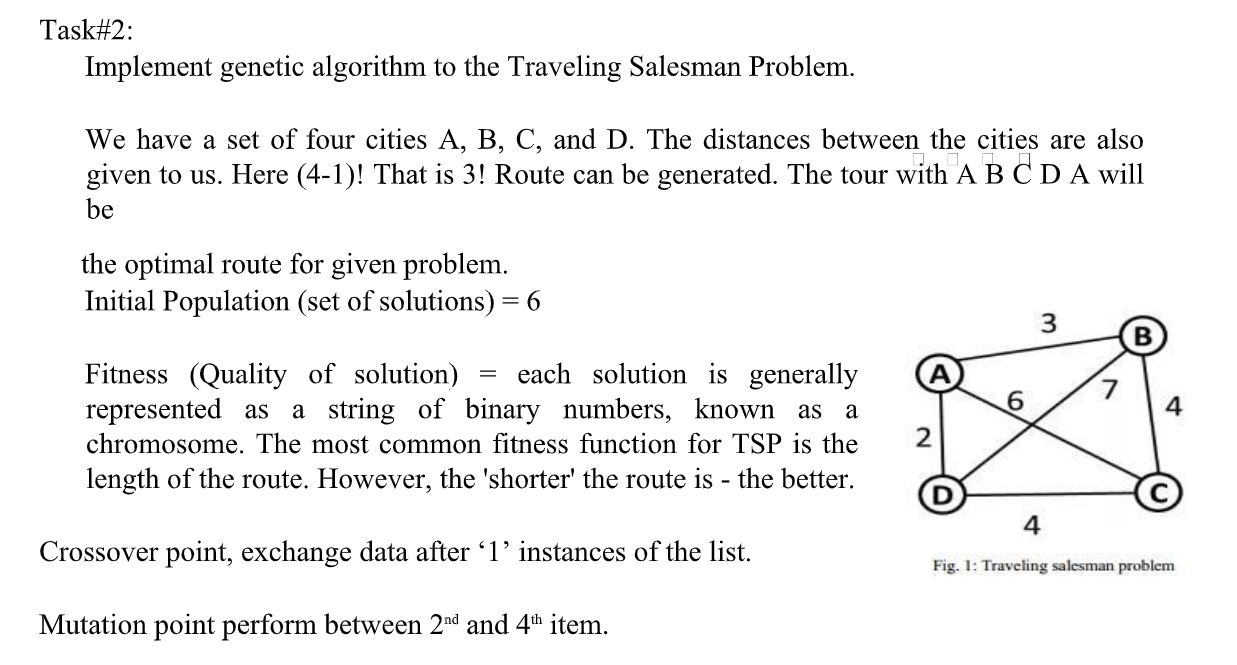

## Task 3:
Write a program to solve the 8-puzzle problem using Heuristics (h(n)) for A*

In [ ]:
import heapq

# Define the goal state
goal_state = (0,1, 2, 3, 4, 5, 6, 7, 8)

# Define the moves
moves = [(0, -1), (0, 1), (-1, 0), (1, 0)]  # Up, Down, Left, Right

def manhattan_distance(state):
    distance = 0
    for i in range(3):
        for j in range(3):
            if state[i * 3 + j] != 0:
                target_row = (state[i * 3 + j] - 1) // 3
                target_col = (state[i * 3 + j] - 1) % 3
                distance += abs(i - target_row) + abs(j - target_col)
    return distance

def get_next_states(state):
    zero_index = state.index(0)
    zero_row, zero_col = zero_index // 3, zero_index % 3
    next_states = []
    for move in moves:
        new_row, new_col = zero_row + move[0], zero_col + move[1]
        if 0 <= new_row < 3 and 0 <= new_col < 3:
            next_state = list(state)
            next_state[zero_index], next_state[new_row * 3 + new_col] = next_state[new_row * 3 + new_col], next_state[zero_index]
            next_states.append(tuple(next_state))
    return next_states

def a_star(initial_state):
    open_list = [(manhattan_distance(initial_state), 0, initial_state, [])]
    closed_set = set()

    while open_list:
        _, g_score, current_state, path = heapq.heappop(open_list)
        if current_state == goal_state:
            return path
        if current_state in closed_set:
            continue
        closed_set.add(current_state)
        for next_state in get_next_states(current_state):
            if next_state not in closed_set:
                f_score = g_score + 1 + manhattan_distance(next_state)
                next_path = path + [next_state]
                heapq.heappush(open_list, (f_score, g_score + 1, next_state, next_path))

# Example usage
initial_state = (1, 2, 3, 0, 4, 6, 7, 5, 8)  # Initial state of the puzzle
steps = a_star(initial_state)
print("Number of steps to solve the puzzle:", steps)
solution_path = a_star(initial_state)
if solution_path:
    print("Steps to solve the puzzle:")
    for i, state in enumerate(solution_path):
        print("Step", i + 1, ":", state)
else:
    print("No solution found!")

Number of steps to solve the puzzle: [(1, 2, 3, 4, 0, 6, 7, 5, 8), (1, 2, 3, 4, 6, 0, 7, 5, 8), (1, 2, 0, 4, 6, 3, 7, 5, 8), (1, 0, 2, 4, 6, 3, 7, 5, 8), (0, 1, 2, 4, 6, 3, 7, 5, 8), (4, 1, 2, 0, 6, 3, 7, 5, 8), (4, 1, 2, 6, 0, 3, 7, 5, 8), (4, 1, 2, 6, 3, 0, 7, 5, 8), (4, 1, 0, 6, 3, 2, 7, 5, 8), (4, 0, 1, 6, 3, 2, 7, 5, 8), (4, 3, 1, 6, 0, 2, 7, 5, 8), (4, 3, 1, 6, 5, 2, 7, 0, 8), (4, 3, 1, 6, 5, 2, 0, 7, 8), (4, 3, 1, 0, 5, 2, 6, 7, 8), (0, 3, 1, 4, 5, 2, 6, 7, 8), (3, 0, 1, 4, 5, 2, 6, 7, 8), (3, 1, 0, 4, 5, 2, 6, 7, 8), (3, 1, 2, 4, 5, 0, 6, 7, 8), (3, 1, 2, 4, 0, 5, 6, 7, 8), (3, 1, 2, 0, 4, 5, 6, 7, 8), (0, 1, 2, 3, 4, 5, 6, 7, 8)]
Steps to solve the puzzle:
Step 1 : (1, 2, 3, 4, 0, 6, 7, 5, 8)
Step 2 : (1, 2, 3, 4, 6, 0, 7, 5, 8)
Step 3 : (1, 2, 0, 4, 6, 3, 7, 5, 8)
Step 4 : (1, 0, 2, 4, 6, 3, 7, 5, 8)
Step 5 : (0, 1, 2, 4, 6, 3, 7, 5, 8)
Step 6 : (4, 1, 2, 0, 6, 3, 7, 5, 8)
Step 7 : (4, 1, 2, 6, 0, 3, 7, 5, 8)
Step 8 : (4, 1, 2, 6, 3, 0, 7, 5, 8)
Step 9 : (4, 1, 0, 6, 3, 2, 7,